<a href="https://colab.research.google.com/github/umesh2908/Building-Energy-Efficiency-Model/blob/master/LNTcontest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
from tensorflow import keras

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Train_SU63ISt.csv to Train_SU63ISt.csv


In [0]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Train_SU63ISt.csv']),parse_dates=['application_date'],index_col="application_date")

In [0]:
df.head()

,segment,branch_id,state,zone,case_count
application_date,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [0]:
df.isnull().sum()

segment           0
branch_id     13504
state             0
zone          13504
case_count        0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
 <a list of 83 Text xticklabel objects>)

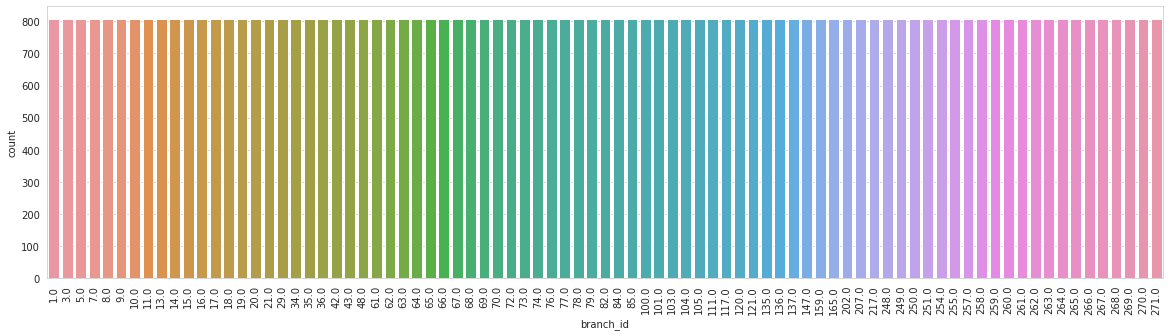

In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
sns.countplot(df.branch_id)
plt.xticks(rotation=90)

In [0]:
df['branch_id']=df['branch_id'].fillna(df['branch_id'].median())

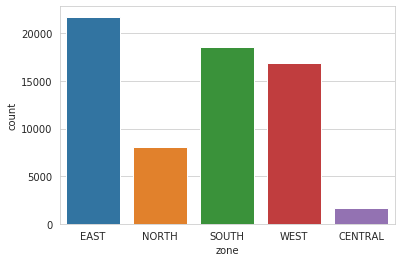

In [0]:
sns.countplot(df['zone'])

In [0]:
df['zone']=df['zone'].fillna('EAST')

In [0]:
df.isnull().sum()

segment       0
branch_id     0
state         0
zone          0
case_count    0
dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
df=pd.get_dummies(df,columns=['state','zone'],drop_first=True)

In [0]:
df.head()

,segment,branch_id,case_count,state_ASSAM,state_BIHAR,state_CHHATTISGARH,state_DELHI,state_GUJARAT,state_HARYANA,state_JHARKHAND,state_KARNATAKA,state_KERALA,state_MADHYA PRADESH,state_MAHARASHTRA,state_ORISSA,state_PUNJAB,state_TAMIL NADU,state_TELANGANA,state_TRIPURA,state_UTTAR PRADESH,state_UTTARAKHAND,state_WEST BENGAL,zone_EAST,zone_NORTH,zone_SOUTH,zone_WEST
application_date,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-04-01,1,1.0,40.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2017-04-03,1,1.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2017-04-04,1,1.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2017-04-05,1,1.0,113.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2017-04-07,1,1.0,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [0]:
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [0]:
df.shape

(80402, 29)

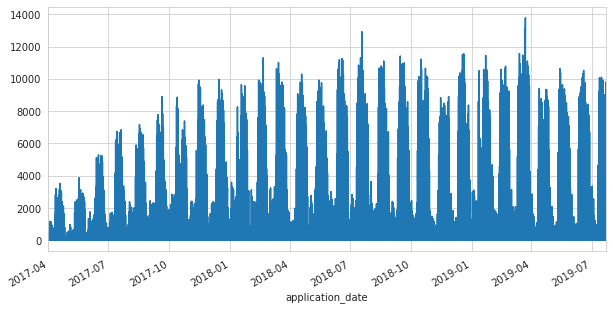

In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
df['case_count'].plot()

In [0]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

72361 8041


In [0]:
df.columns

Index(['segment', 'branch_id', 'case_count', 'state_ASSAM', 'state_BIHAR',
       'state_CHHATTISGARH', 'state_DELHI', 'state_GUJARAT', 'state_HARYANA',
       'state_JHARKHAND', 'state_KARNATAKA', 'state_KERALA',
       'state_MADHYA PRADESH', 'state_MAHARASHTRA', 'state_ORISSA',
       'state_PUNJAB', 'state_TAMIL NADU', 'state_TELANGANA', 'state_TRIPURA',
       'state_UTTAR PRADESH', 'state_UTTARAKHAND', 'state_WEST BENGAL',
       'zone_EAST', 'zone_NORTH', 'zone_SOUTH', 'zone_WEST', 'day_of_month',
       'day_of_week', 'month'],
      dtype='object')

In [0]:
f_columns = ['segment', 'branch_id', 'state_ASSAM', 'state_BIHAR',
       'state_CHHATTISGARH', 'state_DELHI', 'state_GUJARAT', 'state_HARYANA',
       'state_JHARKHAND', 'state_KARNATAKA', 'state_KERALA',
       'state_MADHYA PRADESH', 'state_MAHARASHTRA', 'state_ORISSA',
       'state_PUNJAB', 'state_TAMIL NADU', 'state_TELANGANA', 'state_TRIPURA',
       'state_UTTAR PRADESH', 'state_UTTARAKHAND', 'state_WEST BENGAL',
       'zone_EAST', 'zone_NORTH', 'zone_SOUTH', 'zone_WEST', 'day_of_month',
       'day_of_week', 'month']

In [0]:
from sklearn.preprocessing import RobustScaler
f_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())

train.loc[:, f_columns] = f_transformer.transform( train[f_columns].to_numpy())

test.loc[:, f_columns] = f_transformer.transform( test[f_columns].to_numpy())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
cnt_transformer = RobustScaler()

cnt_transformer = cnt_transformer.fit(train[['case_count']])

train['case_count'] = cnt_transformer.transform(train[['case_count']])

test['case_count'] = cnt_transformer.transform(test[['case_count']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [0]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.case_count, time_steps)
X_test, y_test = create_dataset(test, test.case_count, time_steps)

print(X_train.shape, y_train.shape)

(72351, 10, 29) (72351,)


In [0]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
history = model.fit(  X_train, y_train,  epochs=30,  batch_size=32,  validation_split=0.1,  shuffle=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 65115 samples, validate on 7236 samples
Epoch 1/30
65115/65115 [==============================] - 72s 1ms/sample - loss: 1.0203 - val_loss: 363.2501
Epoch 2/30
65115/65115 [==============================] - 64s 978us/sample - loss: 0.8743 - val_loss: 385.6115
Epoch 3/30
65115/65115 [==============================] - 63s 971us/sample - loss: 0.8236 - val_loss: 399.8420
Epoch 4/30
65115/65115 [==============================] - 62s 958us/sample - loss: 0.7718 - val_loss: 391.4332
Epoch 5/30
65115/65115 [==============================] - 63s 968us/sample - loss: 0.7277 - val_loss: 393.1122
Epoch 6/30
65115/65115 [==============================] - 62s 949us/sample - loss: 0.6808 - val_loss: 380.6309
Epoch 7/30
65115/65115 [==============================] - 62s 958us/sample - loss: 0.6388 - val_loss: 380.1603
E

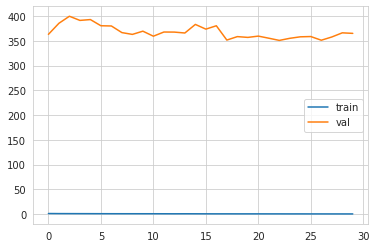

In [0]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()

In [0]:
prediction_train=model.predict(X_test)

In [0]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(prediction_train.reshape(1, -1))

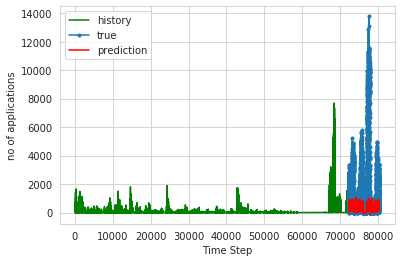

In [0]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('no of applications')
plt.xlabel('Time Step')
plt.legend()
plt.show();


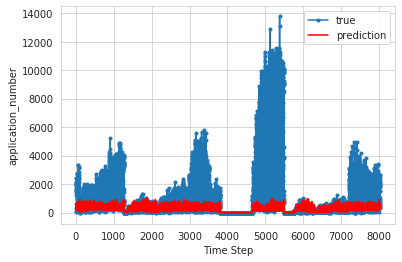

In [0]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('application_number')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test_1eLl9Yf.csv to test_1eLl9Yf.csv


In [0]:
import io
df_test=pd.read_csv(io.BytesIO(uploaded['test_1eLl9Yf.csv']),parse_dates=['application_date'],index_col="application_date")

In [0]:
df_test.shape

(180, 2)

In [0]:
pred_list=[]
batch=train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
  pred_list.append(model.predict(batch)[0])
  batch=np.append(batch[:,1:,:],,[[pred_list[i]]],axis=1)